In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = "./Dataset/Results/User-Study/UserStudy_February_2024.csv"
path_excel = "./Dataset/Results/User-Study/LIME_Assignment.xlsx"


df = pd.read_csv(path)
segmentation_names = pd.read_excel(path_excel)
segmentation_names = segmentation_names.drop("Unnamed: 0", axis=1)
segmentation_dict = segmentation_names.to_dict()

result_dict = {}
for key in segmentation_names.keys():
    result_dict[segmentation_names[key][0]] = []
    
columns = [i for i in df.columns if 'Please ' in i]
columns_split = np.unique([i.split(" ")[10] for i in columns])

result_dict_images = {}
for i in columns_split:
    selected_columns = [j for j in columns if i in j]
    # Use DataFrame to collect values from the selected columns and convert to a numpy array
    result_dict_images[i] = np.array(df[selected_columns].values.tolist())

    
result_dict_images = {k.strip().lower(): v for k, v in result_dict_images.items()}
segmentation_dict = {k.strip().lower(): v for k, v in segmentation_dict.items()}

for i in range(len(result_dict_images)):
    local_key = list(result_dict_images.keys())[i].split(",")[0]
    for j in range(len(result_dict_images[list(result_dict_images.keys())[i]])):
        for k in range(len(result_dict_images[list(result_dict_images.keys())[i]][j])):
            result_dict[segmentation_dict[local_key][k]].append(result_dict_images[list(result_dict_images.keys())[i]][j][k])
        

In [3]:
for key in result_dict.keys():
    print(key, (len(result_dict[key]), np.mean(result_dict[key]), np.std(result_dict[key])))

result_dict['SLIC'] = result_dict.pop('Slic')
result_dict['QS'] = result_dict.pop('Quick')
result_dict['FS'] = result_dict.pop('Fel')
result_dict['WS'] = result_dict.pop('Water')


DSEG (560, 4.258928571428571, 1.155310222054524)
Quick (560, 1.9785714285714286, 1.176968607075319)
Water (560, 2.6107142857142858, 1.3700467368759688)
Slic (560, 2.8875, 1.0487343562599634)
Fel (560, 3.2642857142857142, 1.2003613401550282)


/var/folders/wj/ddcv6d5n6yq1hl3xkczklr8h0000gn/T/ipykernel_95805/67357329.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(result_dict.keys()), y=counts_of_5, palette="Blues_d", width=.7)


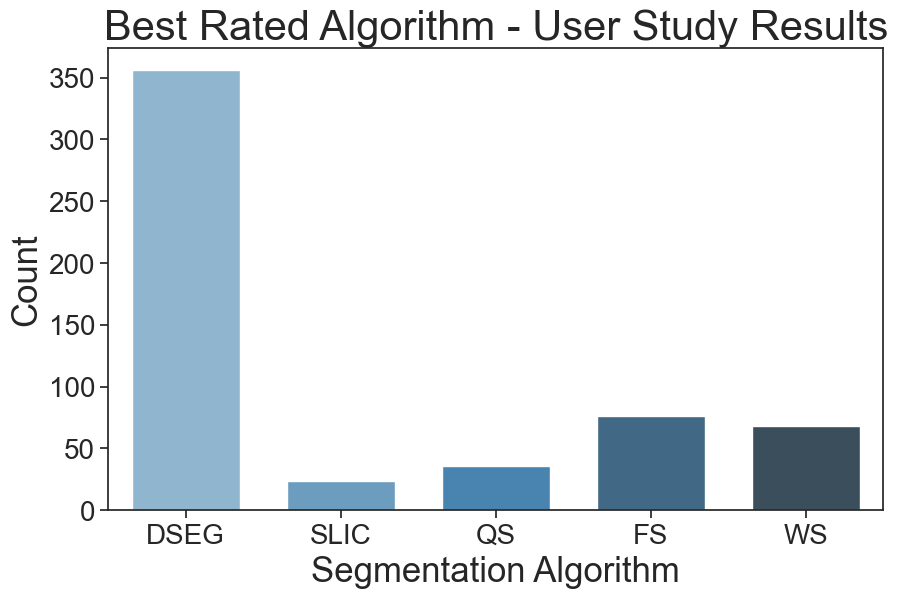

In [4]:
import seaborn as sns

# Setting the seaborn style
sns.set(style="whitegrid")
sns.set(style="ticks",font_scale=1)

counts_of_5 = [sublist.count(5) for sublist in result_dict.values()]

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(result_dict.keys()), y=counts_of_5, palette="Blues_d", width=.7)
plt.xlabel('Segmentation Algorithm', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.title('Best Rated Algorithm - User Study Results', fontsize=30)
plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.show()

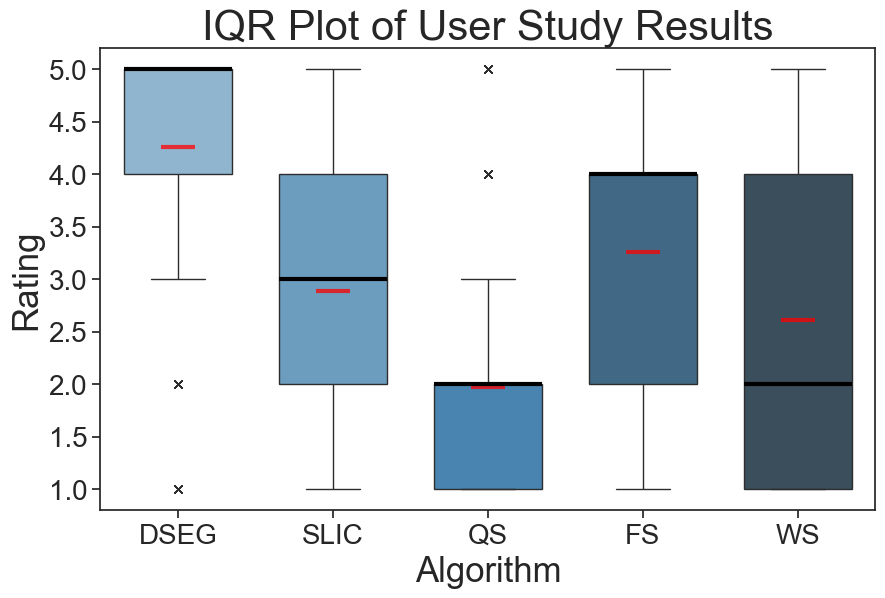

In [5]:
import pandas as pd
# Convert dictionary to DataFrame for seaborn
df = pd.DataFrame(result_dict)

# Creating the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette="Blues_d", width=.7, 
            flierprops={"marker": "x"},
            medianprops={"color": "black", "linewidth": 3},
            )
sns.pointplot(data=df, markers="_", color='red', alpha=0.75, linestyle='none', errorbar=None, estimator='mean', markersize=25, markeredgewidth=3,)

plt.xlabel('Algorithm', fontsize=25)
plt.ylabel('Rating', fontsize=25)
plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

plt.title('IQR Plot of User Study Results', fontsize=30)
plt.show()